In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

# Загрузка данных
data = pd.read_csv('diabetes.csv')

# Разделение данных на признаки и целевую переменную
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение моделей
log_reg = LogisticRegression(max_iter = 1000)
dtree = DecisionTreeClassifier()

log_reg.fit(X_train, y_train)
dtree.fit(X_train, y_train)

# Предсказание
log_reg_pred = log_reg.predict(X_test)


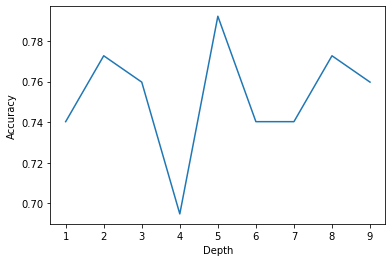

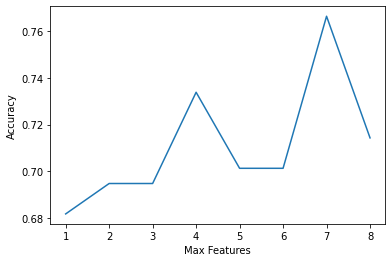

In [2]:
from sklearn.metrics import accuracy_score

# Исследование зависимости метрики от глубины дерева
depths = range(1, 10)
scores = []

for depth in depths:
    dtree = DecisionTreeClassifier(max_depth=depth)
    dtree.fit(X_train, y_train)
    dtree_pred = dtree.predict(X_test)
    score = accuracy_score(y_test, dtree_pred)
    scores.append(score)

plt.plot(depths, scores)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

# Исследование зависимости метрики от max_features
features = range(1, X_train.shape[1] + 1)
scores = []

for feature in features:
    dtree = DecisionTreeClassifier(max_features=feature)
    dtree.fit(X_train, y_train)
    dtree_pred = dtree.predict(X_test)
    score = accuracy_score(y_test, dtree_pred)
    scores.append(score)

plt.plot(features, scores)
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.show()


In [7]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz

# Load in our dataset
iris_data = load_iris()

# Initialize our decision tree object
classification_tree = tree.DecisionTreeClassifier()

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(iris_data.data, iris_data.target)

# Визуализация дерева
dot_data = tree.export_graphviz(classification_tree, out_file=None, 
                     feature_names=iris_data.feature_names,  
                     class_names=iris_data.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

import graphviz 
dot_data = tree.export_graphviz(classification_tree, out_file=None, 
                     feature_names=iris_data.feature_names,  
                     class_names=iris_data.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("iris")


'iris.pdf'